### Feature Selection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
%matplotlib inline

In [2]:
data_df = pd.read_csv("processed.csv")
data_df.columns

Index(['PID', 'PCL.score', 'PHQ.score', 'SDS.score', 'Days.Since', 'Reexp1',
       'Reexp2', 'Avoid1', 'Avoid2', 'NACM1', 'NACM2', 'AAR1', 'AAR2', 'Sleep',
       'Pain', 'Threshold'],
      dtype='object')

In [3]:
#remove ground truth columns
data_df.drop(['PCL.score','PHQ.score','SDS.score'] , axis = 1 , inplace = True)

In [4]:
data_df.head(3)

,PID,Days.Since,Reexp1,Reexp2,Avoid1,Avoid2,NACM1,NACM2,AAR1,AAR2,Sleep,Pain,Threshold
0,202,2.0,2.0,2.50,3.00,3.000,2.00,0.00,0.0,0.50,0.50,5.50,1
1,202,5.5,1.0,1.25,0.75,1.125,1.50,0.75,0.0,0.00,0.75,4.00,1
2,202,9.5,0.0,0.50,0.75,1.000,0.75,0.00,0.0,0.25,1.25,2.75,1


In [5]:
x = data_df[['PID', 'Days.Since', 'Reexp1', 'Reexp2', 'Avoid1', 'Avoid2', 'NACM1','NACM2', 'AAR1', 'AAR2', 'Sleep', 'Pain', 'Threshold']]

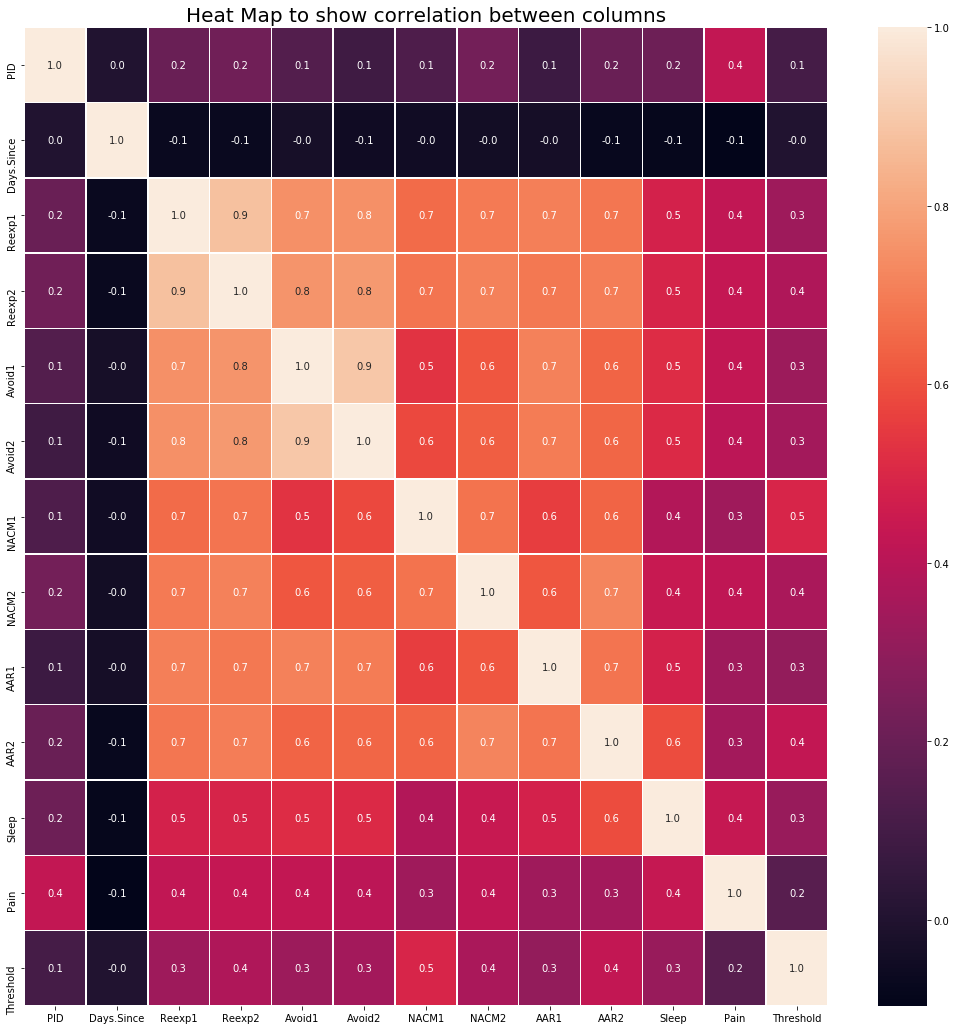

In [6]:
#correlation Heat map
f,ax = plt.subplots(figsize=(18, 18))
sns_heat = sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax).set_title("Heat Map to show correlation between columns",fontsize=20)
fig = sns_heat.get_figure()
fig.savefig('correlation.png')

<i>Closer the correlation value to 1, more is the correlation. Including correlated columns in models can further lead to:</i>
    <li>Overfitting</li>
    <li>Reduced Accuracy</li>
    <li>Reduced Training</li>
Note: Missing value interpolation with average values was performed for processed.csv

In [7]:
dataset = data_df.as_matrix()
X = dataset[:,0:12]
#last column is the target
y = dataset[:,12:13]

# standardize the data attributes
standardized_X = preprocessing.scale(X)

In [8]:
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(standardized_X, y.ravel(), test_size=0.3, random_state=4)

### Random Forest 

In [9]:
rfc = RandomForestClassifier(n_estimators=100,random_state=4)     
rfc = rfc.fit(X_train,y_train)
ac_rfc = accuracy_score(y_test,rfc.predict(X_test))
print('Accuracy is: ',ac_rfc)

Accuracy is:  0.921511627907


### Random Forest Feature Importance 

To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.

Feature ranking:
1. feature 6 (0.150009)
2. feature 0 (0.146303)
3. feature 7 (0.139321)
4. feature 9 (0.126528)
5. feature 11 (0.083419)
6. feature 10 (0.071757)
7. feature 3 (0.071279)
8. feature 2 (0.053848)
9. feature 4 (0.049576)
10. feature 8 (0.042401)
11. feature 5 (0.041168)
12. feature 1 (0.024389)


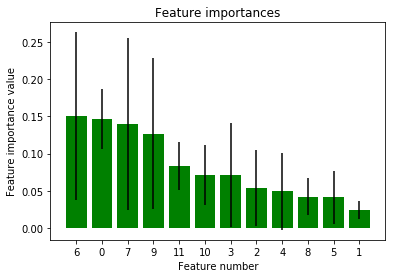

In [10]:
import numpy as np
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
labels =[]
fig = plt.figure()
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    labels.append(indices[f])
# Plot the feature importances of the forest
plt.autoscale()
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
 
plt.xticks(range(X_train.shape[1]), labels,rotation=0)
plt.xlabel("Feature number")
plt.ylabel("Feature importance value")
plt.xlim([-1, X_train.shape[1]])
plt.show()

fig.savefig("featureimp")

As we can see PID (feature 1) has least importance value. We are in a position to drop it.
Higher the feature importance, the more important the value is.

### Feature Importance for cumulative column dataset

In [11]:
data_df = pd.read_csv("withcumcol.csv")
data_df.columns

Index(['PID', 'PCL.score', 'PHQ.score', 'SDS.score', 'Days.Since', 'Reexp1',
       'Reexp2', 'Avoid1', 'Avoid2', 'NACM1', 'NACM2', 'AAR1', 'AAR2', 'Sleep',
       'Pain', 'Reexp1_cum', 'Reexp2_cum', 'Avoid1_cum', 'Avoid2_cum',
       'NACM1_cum', 'NACM2_cum', 'AAR1_cum', 'AAR2_cum', 'Sleep_cum',
       'Pain_cum', 'Threshold'],
      dtype='object')

In [12]:
x = data_df[['PID', 'PCL.score', 'PHQ.score', 'SDS.score',
       'Days.Since', 'Reexp1', 'Reexp2', 'Avoid1', 'Avoid2', 'NACM1', 'NACM2',
       'AAR1', 'AAR2', 'Sleep', 'Pain','Reexp1_cum', 'Reexp2_cum', 'Avoid1_cum', 'Avoid2_cum', 'NACM1_cum',
       'NACM2_cum', 'AAR1_cum', 'AAR2_cum', 'Sleep_cum', 'Pain_cum',
       'Threshold']]

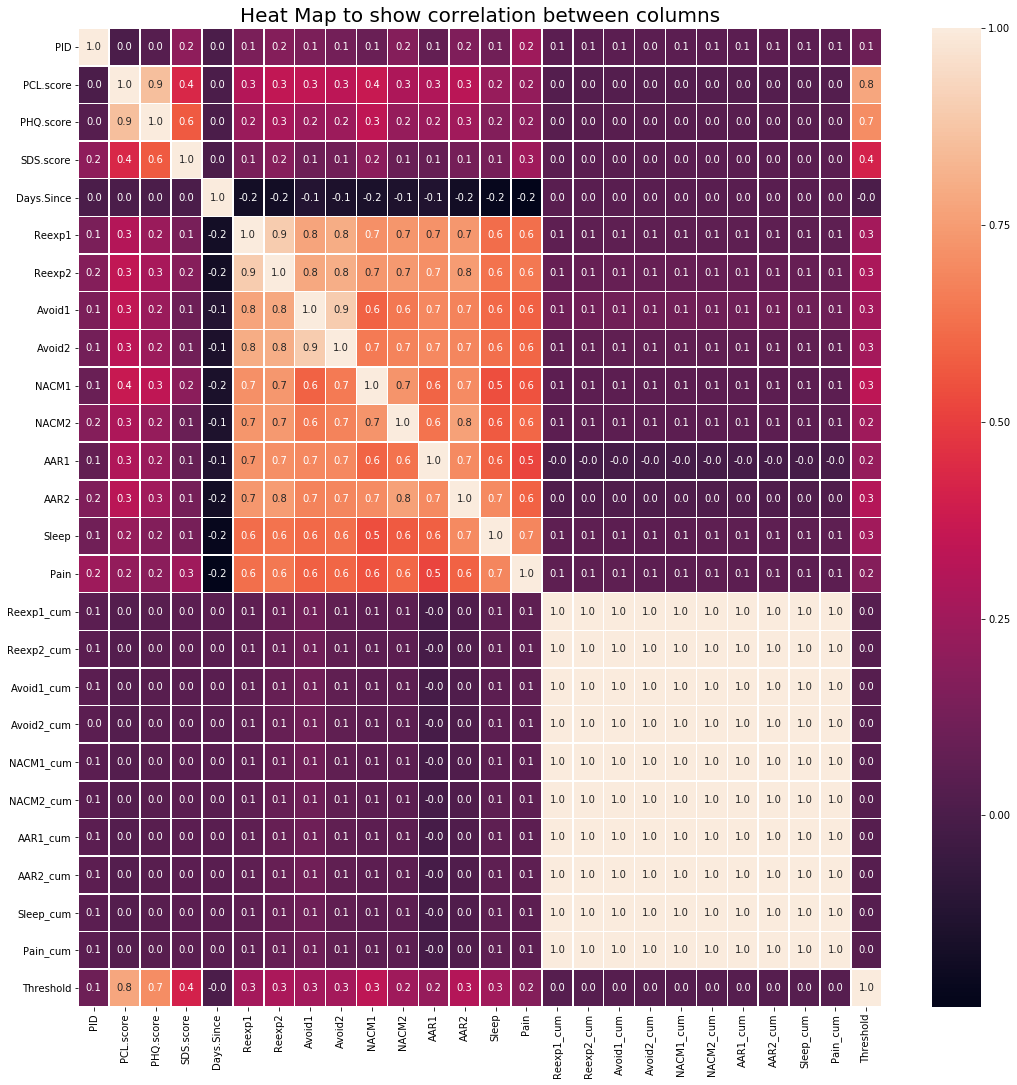

In [13]:
#correlation Heat map
f,ax = plt.subplots(figsize=(18, 18))
sns_heat = sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax).set_title("Heat Map to show correlation between columns",fontsize=20)
fig = sns_heat.get_figure()
fig.savefig('correlationcum.png')

As we can see by adding cumulative columns we get highly correlated features. It is hence not required to use them.

Note: Missing values in cumulative dataset are 0.(withcumcol.csv)